In [ ]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os, cv2

# Input data files are available in the read-only "../input/" directory

directory_path = r"C:\Users\inonz\Desktop\pythone\dataset\asl_dataset"
folders_list = []    
    
# Directory listing    
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path):
        folders_list += [item]
    elif os.path.isdir(item_path):
        folders_list += [f'{item}:{len(os.listdir(item_path))}']        

print(f'Folders: {folders_list}')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Folders: ['0:70', '1:70', '2:70', '3:70', '4:70', '5:70', '6:70', '7:70', '8:70', '9:70', 'a:70', 'b:70', 'c:70', 'd:70', 'e:70', 'f:70', 'g:70', 'h:70', 'i:70', 'j:70', 'k:70', 'l:70', 'm:70', 'n:70', 'o:70', 'p:70', 'q:70', 'r:70', 's:70', 't:65', 'u:70', 'v:70', 'w:70', 'x:70', 'y:70', 'z:70']


In [2]:
# We implemented some functions to visualize the hand landmark detection results. 
# Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

  return annotated_image

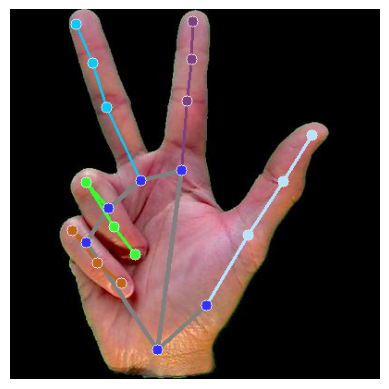

Landmarks:
[0.3992310166358948, 0.9219660758972168, 1.2486378864196013e-06]
[0.5318500995635986, 0.8014317154884338, -0.10624101012945175]
[0.6437766551971436, 0.6107847094535828, -0.13280731439590454]
[0.7380321025848389, 0.4658561646938324, -0.15355443954467773]
[0.8154817819595337, 0.3403623104095459, -0.17063000798225403]
[0.4626848101615906, 0.43724337220191956, -0.040514588356018066]
[0.4792848825454712, 0.24909599125385284, -0.07725273817777634]
[0.490261048078537, 0.13536861538887024, -0.1016649603843689]
[0.49326956272125244, 0.03397378325462341, -0.12094150483608246]
[0.35364246368408203, 0.4643281102180481, -0.03307114541530609]
[0.2616311013698578, 0.2654210925102234, -0.08761868625879288]
[0.22385409474372864, 0.14544814825057983, -0.1282976269721985]
[0.17927247285842896, 0.04057741165161133, -0.1487276554107666]
[0.2658873498439789, 0.5388702154159546, -0.040952712297439575]
[0.20699945092201233, 0.46878644824028015, -0.1499229371547699]
[0.2806200385093689, 0.5898663997

In [3]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

BaseOptions = mp.tasks.BaseOptions

# Create an HandLandmarker object.
#base_options = python.BaseOptions(model_asset_path= r"C:\Users\inonz\Desktop\pythone\hand recognition\hand_recognition\data\hand_landmarker.task")

model_file = open(r"C:\Users\inonz\Desktop\pythone\hand recognition\hand_recognition\data\hand_landmarker.task", "rb")
model_data = model_file.read()
model_file.close()
    
base_options = python.BaseOptions(model_asset_buffer=model_data)

options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# Detect hand landmarks from the input image
image = mp.Image.create_from_file(r"C:\Users\inonz\Desktop\pythone\dataset\asl_dataset\3\hand1_3_bot_seg_2_cropped.jpeg")
detection_result = detector.detect(image)

# Process the classification result and visualize it
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(annotated_image)
plt.axis("off")
plt.show()

print('Landmarks:')
for landmark in detection_result.hand_landmarks[0]:
    print([landmark.x, landmark.y, landmark.z])
    
landmarks_cnt = len(detection_result.hand_landmarks[0])
print(f'landmarks count: {landmarks_cnt}')

In [4]:
from PIL import Image, ImageOps

images, source_df = [], []
skipped_images = 0

# Create numpy array with classes and images    
for folder in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder)
    
    if os.path.isdir(folder_path):
        for item in os.listdir(folder_path):
            item_path = os.path.join(folder_path, item)
            if os.path.isfile(item_path):

                # Reading an image and adding a black border for more stable landmark detection
                border_size = 100
                source_img = Image.open(item_path)
                img = np.array(ImageOps.expand(source_img, border=border_size, fill='black'))
                img = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)
                detection_result = detector.detect(img)
                
                if len(detection_result.hand_landmarks) > 0:
                    annotated_image = draw_landmarks_on_image(img.numpy_view(), detection_result)
                    annotated_image = annotated_image[border_size:-border_size, border_size:-border_size]

                    landmarks = [[lm.x, lm.y, lm.z] for lm in detection_result.hand_landmarks[0]]        
                    source_df += [{"class": folder, 
                                  "image": np.array(source_img),
                                  "annotated_image": annotated_image,
                                  "landmarks": landmarks
                                  }]
                else:
                    skipped_images += 1
                
print(f'images:{len(source_df)}  skipped:{skipped_images}')
source_df = pd.DataFrame(source_df)

images:2374  skipped:141


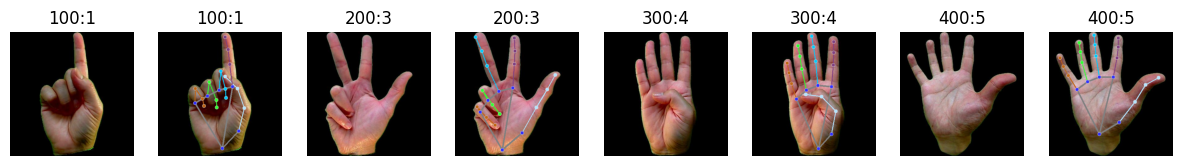

In [5]:
img_nums = (100, 200, 300, 400)

plt.figure(figsize=(15, 3))

for i in range(4):
    row = source_df.iloc[img_nums[i]]
    
    plt.subplot(1, 8, i*2+1)
    plt.imshow(row['image'])
    plt.title(f"{img_nums[i]}:{row['class']}")
    plt.axis("off")

    plt.subplot(1, 8, i*2+2)
    plt.imshow(row['annotated_image'])
    plt.title(f"{img_nums[i]}:{row['class']}")
    plt.axis("off")

plt.show()

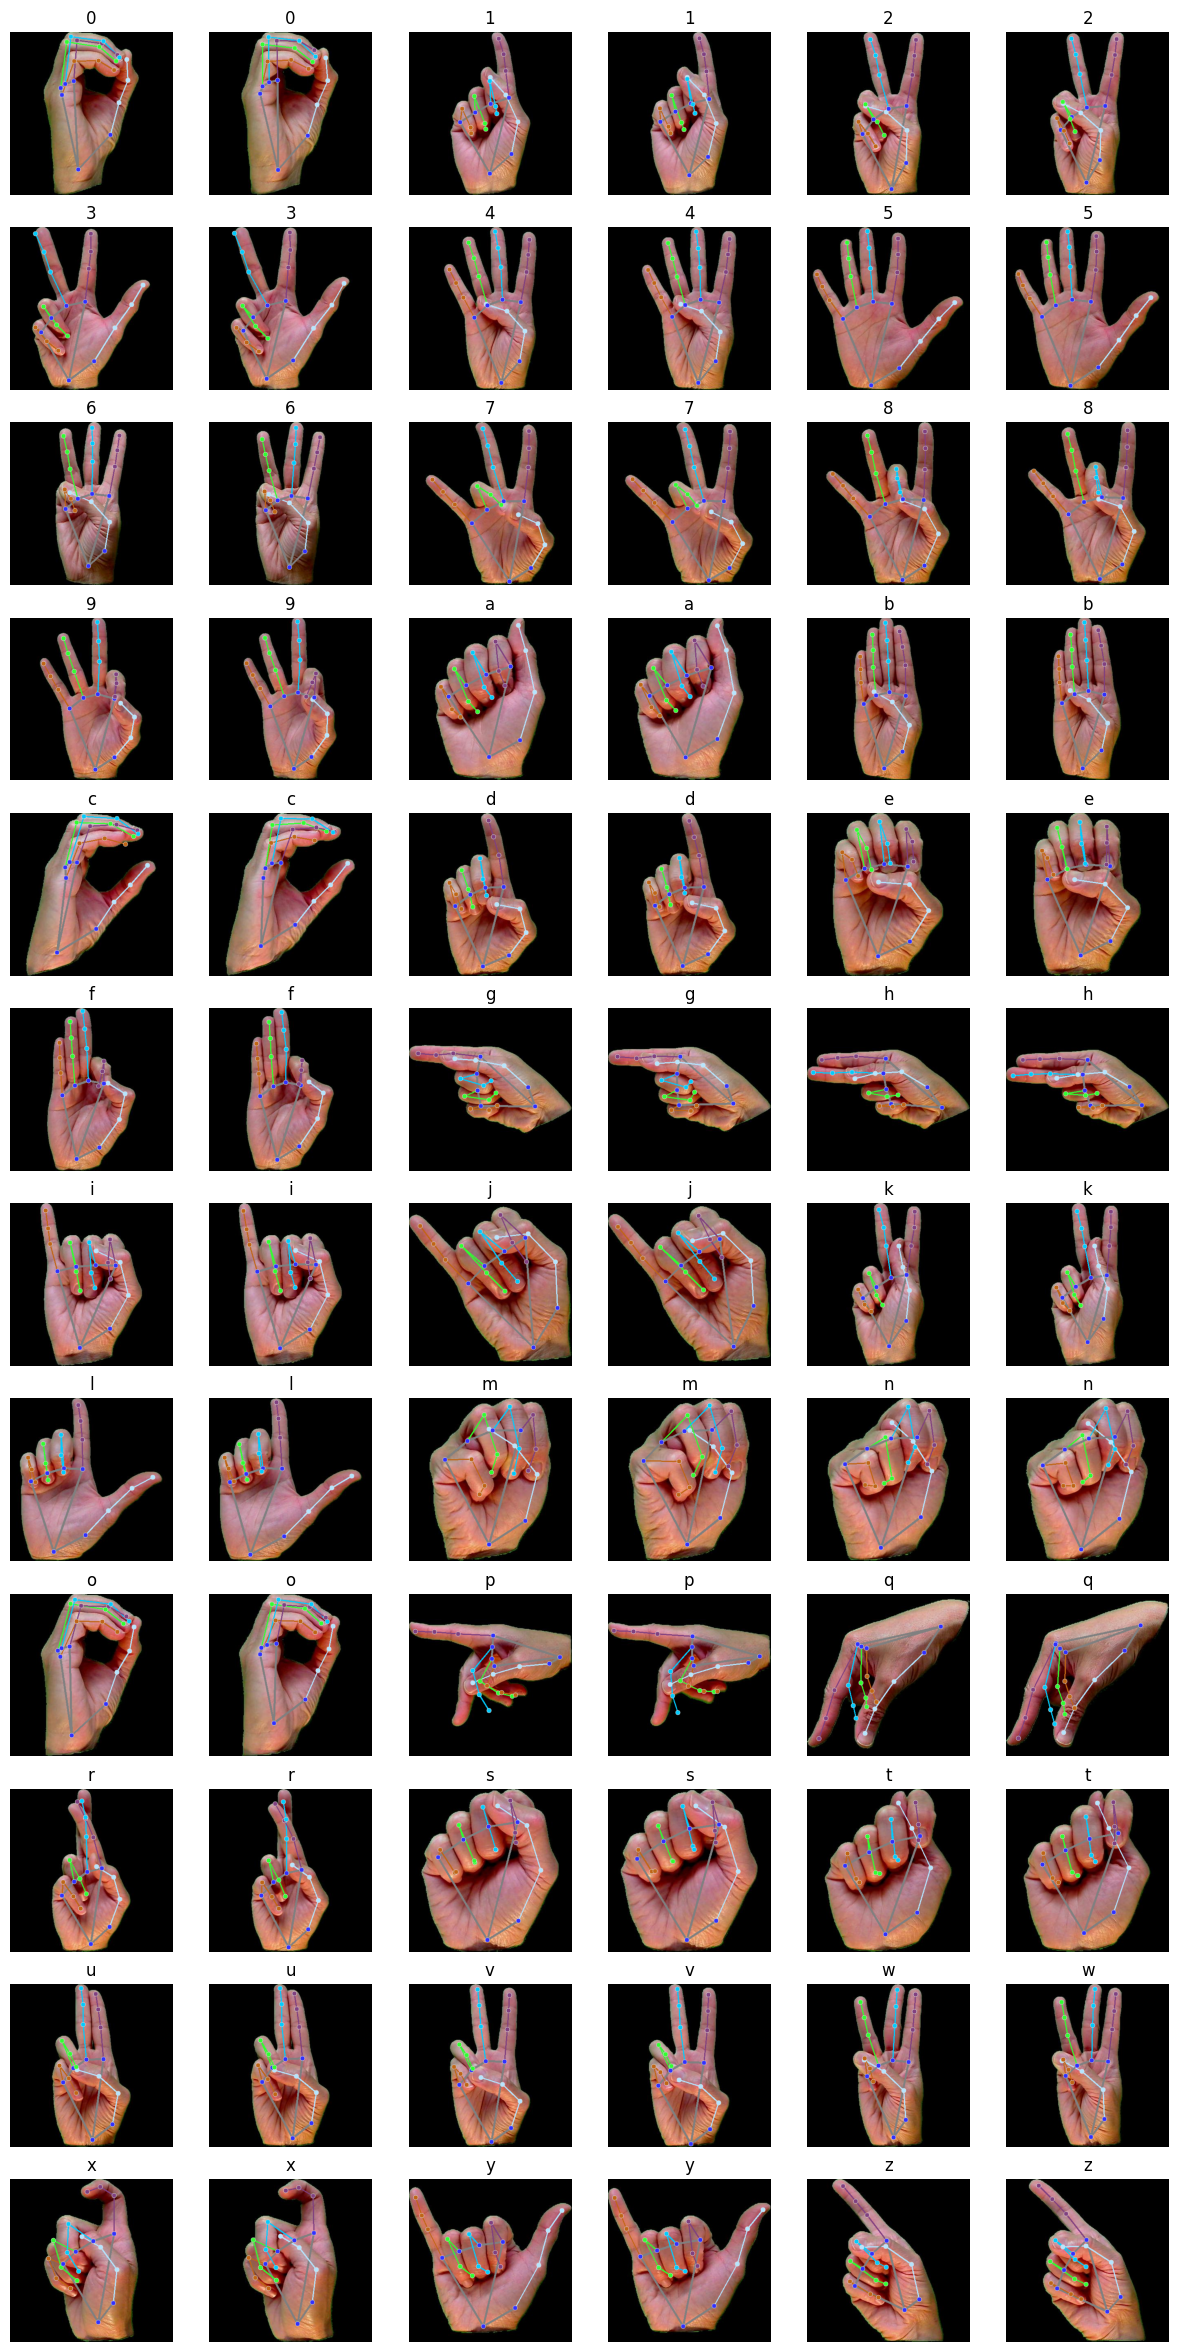

In [6]:
result = source_df.groupby('class').head(2)

plt.figure(figsize=(15, 30))
for i in range(72):
    plt.subplot(12, 6, i + 1)
    plt.imshow(result.iloc[i]['annotated_image'])
    plt.title(result.iloc[i]['class'])
    plt.axis("off")

plt.show()

In [7]:
# Compute the number of records in each class
print(dict(source_df.groupby('class').size()))

{'0': 61, '1': 67, '2': 70, '3': 70, '4': 67, '5': 70, '6': 60, '7': 63, '8': 64, '9': 68, 'a': 70, 'b': 70, 'c': 60, 'd': 70, 'e': 63, 'f': 70, 'g': 69, 'h': 69, 'i': 70, 'j': 61, 'k': 70, 'l': 70, 'm': 62, 'n': 65, 'o': 61, 'p': 64, 'q': 51, 'r': 66, 's': 70, 't': 65, 'u': 70, 'v': 69, 'w': 63, 'x': 63, 'y': 70, 'z': 63}


In [8]:
print(source_df[["class", "landmarks"]].head(10))

  class                                          landmarks
0     0  [[0.44664904475212097, 0.7297391891479492, 6.3...
1     0  [[0.4485260248184204, 0.7316476106643677, 7.31...
2     0  [[0.37690722942352295, 0.7331454753875732, 9.0...
3     0  [[0.4241657853126526, 0.7123894095420837, 7.36...
4     0  [[0.4402437210083008, 0.7462332248687744, 6.44...
5     0  [[0.4355679452419281, 0.7421363592147827, 6.70...
6     0  [[0.41891467571258545, 0.7433403730392456, 6.7...
7     0  [[0.38562440872192383, 0.7423305511474609, 7.0...
8     0  [[0.44798317551612854, 0.7435941100120544, 6.8...
9     0  [[0.38867437839508057, 0.7535814046859741, 3.9...


In [9]:
# Create a dictionary mapping class names to numbers (indices)
encoded_df = source_df[['class','landmarks']].copy()
class_names = sorted(encoded_df['class'].unique())
num_classes = len(class_names)
class_to_index = {name: index for index, name in enumerate(class_names)}
print("Class to Index Mapping:", class_to_index)

# One-hot encode the 'class' column
encoded_df['class'] = encoded_df['class'].map(class_to_index)
encoded_df = pd.get_dummies(encoded_df, columns=['class'], prefix='', prefix_sep='')

print(encoded_df.head())

dataset = tf.data.Dataset.from_tensor_slices((
    np.stack(encoded_df['landmarks'].values), 
    encoded_df.drop(columns=['landmarks']).values)).shuffle(len(encoded_df))

Class to Index Mapping: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'q': 26, 'r': 27, 's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32, 'x': 33, 'y': 34, 'z': 35}
                                           landmarks     0      1      2  \
0  [[0.44664904475212097, 0.7297391891479492, 6.3...  True  False  False   
1  [[0.4485260248184204, 0.7316476106643677, 7.31...  True  False  False   
2  [[0.37690722942352295, 0.7331454753875732, 9.0...  True  False  False   
3  [[0.4241657853126526, 0.7123894095420837, 7.36...  True  False  False   
4  [[0.4402437210083008, 0.7462332248687744, 6.44...  True  False  False   

       3      4      5      6      7      8  ...     26     27     28     29  \
0  False  False  False  False  False  False  ...  False  False  False  False   
1  False  False  False  False  False  False 

In [13]:
validation_split = 0.2
test_split = 0.1
batch_size = 25

# Calculate sizes for splitting
dataset_size = len(dataset)
val_size = int(validation_split * dataset_size)
test_size = int(test_split * dataset_size)
train_size = dataset_size - val_size - test_size

# Split the dataset
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size).take(test_size)
validation_dataset = dataset.skip(train_size + test_size)

# Optional: Prefetching for performance
train_dataset = train_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(test_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

print('Dataset size')
print(f'training: {train_size}  validation: {val_size}  test: {test_size}')

Dataset size
training: 1663  validation: 474  test: 237


In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling1D, BatchNormalization, Dropout, Layer
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch, BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping

total_dense_units = 300

# Define a model builder function for hyperparameter tuning
def build_model(hp):
    dense_units_1 = hp.Int('dense_units_1', min_value=16, max_value=total_dense_units/2-8, step=16)
    dense_units_2 = hp.Int('dense_units_2', min_value=16, max_value=total_dense_units/2-8, step=16)
    dense_units_3 = total_dense_units-dense_units_2-dense_units_1    
    
    model = Sequential([ 
        Input(shape=(landmarks_cnt, 3)), 
        
        # Center all the records
        Lambda(lambda x: x - tf.reduce_mean(x, axis=1, keepdims=True), name='Centering_Layer'),  
        Flatten(),
        BatchNormalization(axis=1),
        
        Dense(units=dense_units_1, activation='selu'),
        Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(units=dense_units_2, activation='selu'),
        Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(units=dense_units_3, activation='selu'),
        Dropout(hp.Float('dropout3', min_value=0.1, max_value=0.5, step=0.1)),
        
        Dense(num_classes, activation='softmax', name='Softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set up the tuner
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=30,  # Number of models to try
    executions_per_trial=3,  # Number of trials for each model
    directory='my_dir',
    project_name='pose_estimation_tuning',
    overwrite=True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Search for the best hyperparameters
tuner.search(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=[stop_early])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters()[0]

ImportError: Please install scikit-learn (sklearn) before using the `BayesianOptimization` with `pip install keras-tuner[bayesian]`.

In [ ]:
tuner.results_summary(5)

In [ ]:
best_model.summary()

In [18]:
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling1D, BatchNormalization, Dropout, Layer , LayerNormalization 

model = Sequential([ 
    Input(shape=(landmarks_cnt, 3)),
    LayerNormalization(axis=1 , scale=False),
    #Lambda(lambda x: x - tf.reduce_mean(x, axis=1, keepdims=True), name='Centering_Layer'),
    Flatten(),
    LayerNormalization(axis=1),
    Dense(80, activation='elu'),
    Dropout(.1),
    Dense(96, activation='elu'),
    Dropout(.4),
    Dense(124, activation='elu'),
    Dropout(.1),
    Dense(num_classes, activation='softmax', name='Softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization_2 (Lay  (None, 21, 3)             21        
 erNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 63)                0         
                                                                 
 layer_normalization_3 (Lay  (None, 63)                126       
 erNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 80)                5120      
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_4 (Dense)             (None, 96)               

In [19]:
from keras.utils import plot_model

plot_model(model=model, show_shapes=True, dpi=54, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
history = model.fit(train_dataset, epochs=150, verbose=1, validation_data=validation_dataset)

67/67 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.8304 - val_loss: 0.2959 - val_accuracy: 0.9177


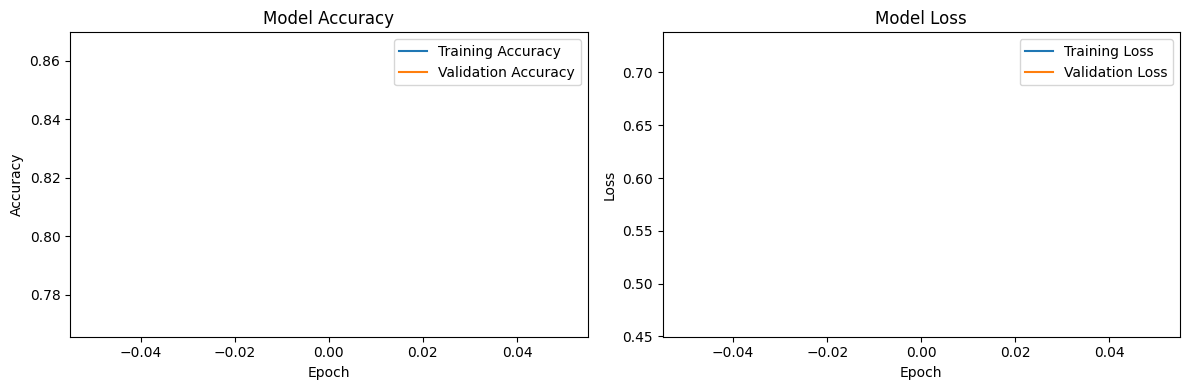

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

landmarks, labels = list(test_dataset.as_numpy_iterator())[0]
true_labels = np.argmax(labels, axis=1)
predictions = model.predict(landmarks)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [32]:

#model.save('model1.keras')
#model.save_weights('model1.h5')
#model.export(r"C:\Users\inonz\Desktop\pythone\dataset\model1" )

converter = tf.lite.TFLiteConverter.from_keras_model(model)

# המרה ל-TensorFlow Lite
tflite_model = converter.convert()

# שמור את המודל כקובץ .tflite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\inonz\AppData\Local\Temp\tmp252_3ggh\assets


INFO:tensorflow:Assets written to: C:\Users\inonz\AppData\Local\Temp\tmp252_3ggh\assets


Saved artifact at 'C:\Users\inonz\AppData\Local\Temp\tmp252_3ggh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 3), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 36), dtype=tf.float32, name=None)
Captures:
  1273936540112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1273936539728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1273936539920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1273936541264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1273936541840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1273936541648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1273936542608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1273936542416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1273936543184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1273936543376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1277846

In [24]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf

# Load the trained model (architecture + weights)
# model = tf.keras.models.load_model('model.h5')

# Define class names for numbers and lowercase letters
class_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
    'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
    'u', 'v', 'w', 'x', 'y', 'z'
]

# Initialize MediaPipe hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=2, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Open the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Ignoring empty camera frame.")
        continue

    # Flip the image horizontally for a later selfie-view display
    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame to detect hand landmarks
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            # Identify if it's the right or left hand
            label = handedness.classification[0].label  # 'Right' or 'Left'
            
            # Draw hand landmarks on the frame
            mp_drawing.draw_landmarks(
                frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extract landmarks as a numpy array
            landmarks = [[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]
            landmarks = np.array(landmarks).reshape(1, -1, 3)

            # Predict the hand sign using the model
            prediction = model.predict(landmarks)
            predicted_class = np.argmax(prediction)
            predicted_label = class_names[predicted_class]

            # Display the predicted label on the frame (larger size)
            cv2.putText(frame, f'{label}: {predicted_label}', (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 4, cv2.LINE_AA)

    # Display the frame
    cv2.imshow('Hand Sign Detection', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close the window
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

C:\Users\inonz\miniconda3\envs\UpToDate\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━